In [76]:
#'''São disponibilizadas estimativas de 1ª Ordem (que supõe de modo simplificado que 100% das emissões ocorram 
#no momento da mudança de uso/cobertura) e de 2ª Ordem (que buscam representar o processo gradativo de liberação 
#e absorção do carbono como ocorre de fato). As estimativas de emissões de 2ª Ordem apresentam uma resposta 
#atenuada em relação a oscilações da taxa do desmatamento (aumentos e quedas), pois carregam a influência das 
#emissões históricas, isto é, dos processos de decomposição/queima da biomassa remanescente dos desmatamentos 
#ocorridos nos anos anteriores. As estimativas de 2ª Ordem representam com maior precisão e embasamento científico 
#para estudos relativos ao ciclo de carbono. As estimativas de 1ª Ordem são normalmente utilizadas para reportar 
#emissões de modo mais simples e intuitivo.'''

import pandas as pd
dados = pd.read_csv('co2.csv',sep=',')
dados.head()

,Year,D_Area,D_AreaAcc,VR_CO2_1stOrder,VR_CO2_2ndOrder,VR_CO2_2ndOrder_fire,VR_CO2_2ndOrder_decay,VR_CH4_CO2Eq_2ndOrder_fire,VR_N2O_CO2Eq_2ndOrder_fire,SV_area_total,SV_area_cleared,SV_CO2_emission,SV_CO2_absorption,net_CO2_2ndOrder,net_CO2_1rsOrder
0,1960,842754,842754,459,149,149,0,16,4,176978,0,0,0,149,0
1,1961,842754,1685508,459,247,149,98,16,4,353956,0,0,0,247,0
2,1962,842754,2528262,459,309,149,159,16,4,530935,0,0,0,309,0
3,1963,842754,3371016,459,347,149,198,16,4,707913,0,0,-3,345,3
4,1964,842754,4213770,459,373,149,224,16,4,884891,0,0,-6,368,6


In [77]:
co2 = dados.iloc[:,1:15].values
len(co2)

58

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=3,init='random',n_init=5)

In [61]:
kmeans.fit(xco2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [62]:
kmeans.cluster_centers_

array([[ 1.81398750e+06,  4.05815385e+07,  9.88500000e+02,
         9.57437500e+02,  3.20437500e+02,  6.36375000e+02,
         3.45000000e+01,  1.02500000e+01,  8.52212262e+06,
         3.46654000e+05,  4.41875000e+01, -9.44375000e+01,
         9.08062500e+02,  1.38625000e+02],
       [ 1.06618809e+06,  1.06755463e+07,  5.80826087e+02,
         4.67782609e+02,  1.88478261e+02,  2.79173913e+02,
         2.02608696e+01,  5.39130435e+00,  2.24186430e+06,
         5.11450435e+04,  5.65217391e+00, -2.32173913e+01,
         4.51086957e+02,  2.88695652e+01],
       [ 1.28279368e+06,  6.84192124e+07,  6.84842105e+02,
         7.25368421e+02,  2.24789474e+02,  4.99947368e+02,
         2.41578947e+01,  6.94736842e+00,  1.49789496e+07,
         9.09273000e+05,  1.12210526e+02, -1.71789474e+02,
         6.66526316e+02,  2.84000000e+02]])

In [63]:
kmeans.fit(xco2)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=3, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
kmeans.cluster_centers_

array([[ 1.83690625e+06,  3.87675510e+07,  1.00100000e+03,
         9.61125000e+02,  3.24500000e+02,  6.36062500e+02,
         3.49375000e+01,  1.03750000e+01,  8.14118525e+06,
         3.21847563e+05,  4.10625000e+01, -8.96875000e+01,
         9.13375000e+02,  1.30750000e+02],
       [ 1.30556900e+06,  6.76755581e+07,  6.97950000e+02,
         7.34650000e+02,  2.28900000e+02,  5.05100000e+02,
         2.46000000e+01,  7.10000000e+00,  1.47922365e+07,
         8.90507500e+05,  1.10050000e+02, -1.69650000e+02,
         6.75800000e+02,  2.79700000e+02],
       [ 1.01896936e+06,  1.00461472e+07,  5.55090909e+02,
         4.44954545e+02,  1.80136364e+02,  2.64681818e+02,
         1.93636364e+01,  5.09090909e+00,  2.10969050e+06,
         4.72398182e+04,  5.04545455e+00, -2.18636364e+01,
         4.29000000e+02,  2.69090909e+01]])

In [65]:
distance = kmeans.fit_transform(xco2)
distance

array([[40618664.40236305, 10049880.49633567, 69185956.01895007],
       [39757811.80786658,  9188989.30488311, 68324945.35335054],
       [38896971.56461038,  8328148.5695347 , 67463937.6785343 ],
       [38036144.93497446,  7467376.21877448, 66602933.54649254],
       [37175332.6442619 ,  6606698.6942905 , 65741932.87369418],
       [36314535.50649538,  5746158.40039737, 64880935.58326156],
       [35453686.62797651,  4885759.47347738, 64019842.22447319],
       [34592856.21734307,  4025690.8640891 , 63158754.83627012],
       [33732033.67764049,  3166208.25332276, 62297656.17662219],
       [32871240.42496907,  2307995.72374325, 61436575.80954691],
       [32010449.84537774,  1453257.36210415, 60575472.31915803],
       [31149699.94298471,   616724.63866696, 59714399.85462125],
       [30288947.73289896,   363222.13307805, 58853291.63762299],
       [29428246.06066994,  1169076.68091556, 57992223.68128041],
       [28567533.45324459,  2021104.7077021 , 57131100.590223  ],
       [27

In [66]:
labels = kmeans.labels_

In [67]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [68]:
kmeans.cluster_centers_

array([[ 1.81398750e+06,  4.05815385e+07,  9.88500000e+02,
         9.57437500e+02,  3.20437500e+02,  6.36375000e+02,
         3.45000000e+01,  1.02500000e+01,  8.52212262e+06,
         3.46654000e+05,  4.41875000e+01, -9.44375000e+01,
         9.08062500e+02,  1.38625000e+02],
       [ 1.06618809e+06,  1.06755463e+07,  5.80826087e+02,
         4.67782609e+02,  1.88478261e+02,  2.79173913e+02,
         2.02608696e+01,  5.39130435e+00,  2.24186430e+06,
         5.11450435e+04,  5.65217391e+00, -2.32173913e+01,
         4.51086957e+02,  2.88695652e+01],
       [ 1.28279368e+06,  6.84192124e+07,  6.84842105e+02,
         7.25368421e+02,  2.24789474e+02,  4.99947368e+02,
         2.41578947e+01,  6.94736842e+00,  1.49789496e+07,
         9.09273000e+05,  1.12210526e+02, -1.71789474e+02,
         6.66526316e+02,  2.84000000e+02]])

In [69]:
print(kmeans.cluster_centers_)

[[ 1.81398750e+06  4.05815385e+07  9.88500000e+02  9.57437500e+02
   3.20437500e+02  6.36375000e+02  3.45000000e+01  1.02500000e+01
   8.52212262e+06  3.46654000e+05  4.41875000e+01 -9.44375000e+01
   9.08062500e+02  1.38625000e+02]
 [ 1.06618809e+06  1.06755463e+07  5.80826087e+02  4.67782609e+02
   1.88478261e+02  2.79173913e+02  2.02608696e+01  5.39130435e+00
   2.24186430e+06  5.11450435e+04  5.65217391e+00 -2.32173913e+01
   4.51086957e+02  2.88695652e+01]
 [ 1.28279368e+06  6.84192124e+07  6.84842105e+02  7.25368421e+02
   2.24789474e+02  4.99947368e+02  2.41578947e+01  6.94736842e+00
   1.49789496e+07  9.09273000e+05  1.12210526e+02 -1.71789474e+02
   6.66526316e+02  2.84000000e+02]]


No handles with labels found to put in legend.


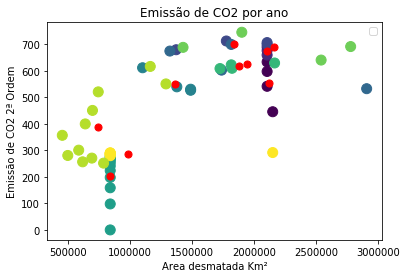

In [75]:
import matplotlib.pyplot as plt
plt.scatter(xco2[:, 0], xco2[:,5], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 5], s = 50, c = 'red')
plt.title('Emissão de CO2 por ano')
plt.xlabel('Area desmatada Km²')
plt.ylabel('Emissão de CO2 2ª Ordem por queimadas')
plt.legend()
plt.show()

No handles with labels found to put in legend.


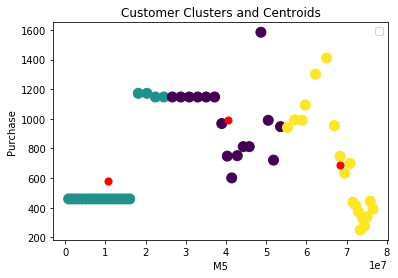

In [71]:
import matplotlib.pyplot as plt
plt.scatter(xco2[:, 1], xco2[:,2], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 50, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('M5')
plt.ylabel('Purchase')
plt.legend()
plt.show()

1 3.957954505066613e+16
2 8043311858475286.0
3 3045731312015958.0
4 1730172361688736.5
5 1066099839825644.1
6 721394473960136.5
7 568576387883905.8
8 421429150841935.6
9 346745101122184.9
10 304474120071402.4


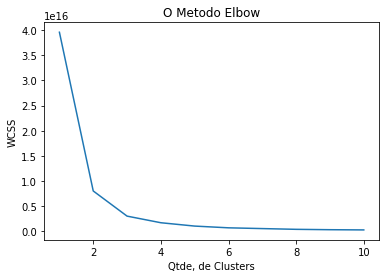

In [72]:
# Metododo de Elbow: como encontrar valor ideal de K ?
# Basicamente o que o método faz é testar a variância dos dados em relação ao número de clu
# O que percebemos no Gráfico abaixo?
# Soma dos erros quadráticos de cada cluster (WCSS) cai e se estabiliza, à medida que aumen
import matplotlib.pyplot as plt
wcss = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(xco2)
    print (i,kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, maxclusters), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()